In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
data = pd.read_csv("survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [161]:
data.tail()
data.shape

(309, 16)

In [162]:
cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [164]:
column_names = data.columns.tolist()
print(column_names) # Get the column names as a list print(column_names)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


In [165]:

data.isnull().sum()
# print(cancer_data)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [166]:
modes = data.mode()
print(modes)

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   64        2               2        1              2   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                2         2         2         2                  2         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      1           2         YES  


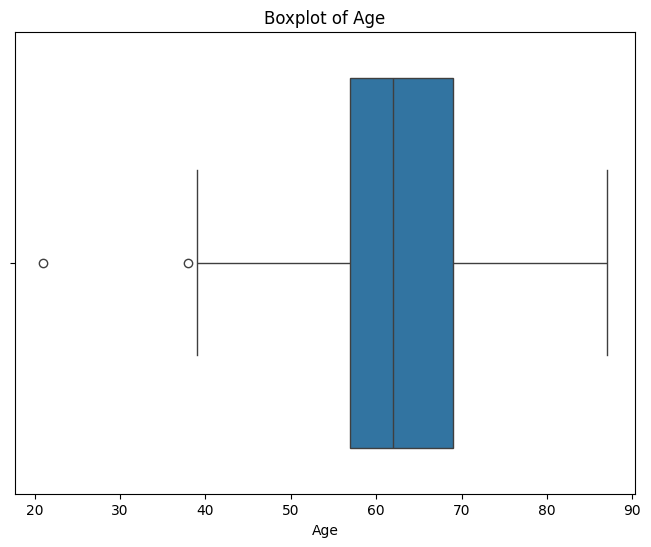

In [167]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.boxplot(x=data['AGE'])  # Create the boxplot for the 'AGE' column

# Set the title and labels
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Display the plot
plt.show()

In [182]:
def outlier_treatment(col):
    
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [183]:
lower_range,upper_range = outlier_treatment(data['AGE'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: 41.5
Upper Range: 85.5


In [184]:
lower_data = data[data['AGE'].values < lower_range]
lower_data['AGE']

261    39
Name: AGE, dtype: int64

In [185]:
upper_data = data[data['AGE'].values > upper_range]
upper_data['AGE']

277    87
Name: AGE, dtype: int64

In [186]:

lower_outliers = lower_data.value_counts().sum(axis=0)
upper_outliers = upper_data.value_counts().sum(axis=0)
total_outliers = lower_outliers + upper_outliers
print("Total Number of Outliers:",total_outliers)

Total Number of Outliers: 2


In [187]:
lower_index = list(data[ data['AGE'] < lower_range ].index)
upper_index = list(data[ data['AGE'] > upper_range ].index)
total_index = list(lower_index + upper_index)
print(total_index)

[261, 277]


In [188]:
print("Shape Before Dropping Outlier Rows:", data.shape)
data.drop(total_index, inplace = True)
print("Shape After Dropping Outlier Rows:", data.shape)

Shape Before Dropping Outlier Rows: (307, 16)
Shape After Dropping Outlier Rows: (305, 16)


In [189]:
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data = data[(data['AGE'] >= lower_bound) & (data['AGE'] <= upper_bound)]

print(f"Original data size: {data.shape[0]}")
print(f"Cleaned data size: {cleaned_data.shape[0]}")

Original data size: 305
Cleaned data size: 305


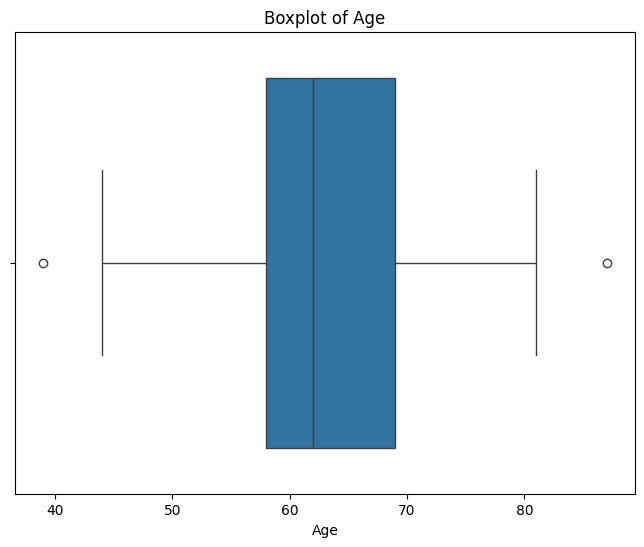

In [176]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.boxplot(x=data['AGE'])  # Create the boxplot for the 'AGE' column

# Set the title and labels
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Display the plot
plt.show()

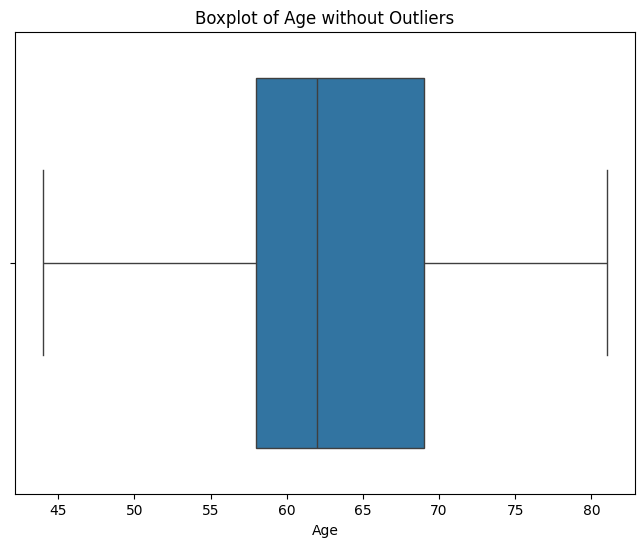

In [190]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.boxplot(x=data['AGE'])  # Create the boxplot for the 'AGE' column

# Set the title and labels
plt.title('Boxplot of Age without Outliers')
plt.xlabel('Age')

# Display the plot
plt.show()

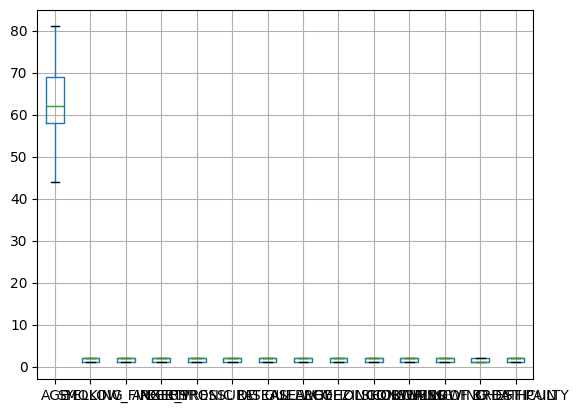

In [191]:
data.boxplot()
plt.show()

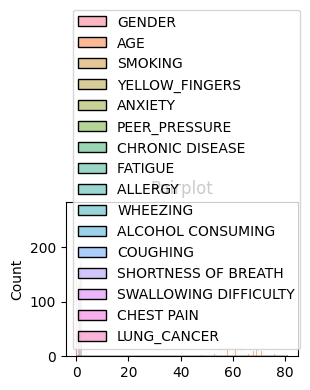

In [239]:

plt.figure(figsize=(3, 2))
sns.histplot(data)
plt.title('Pairplot')
plt.show()

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


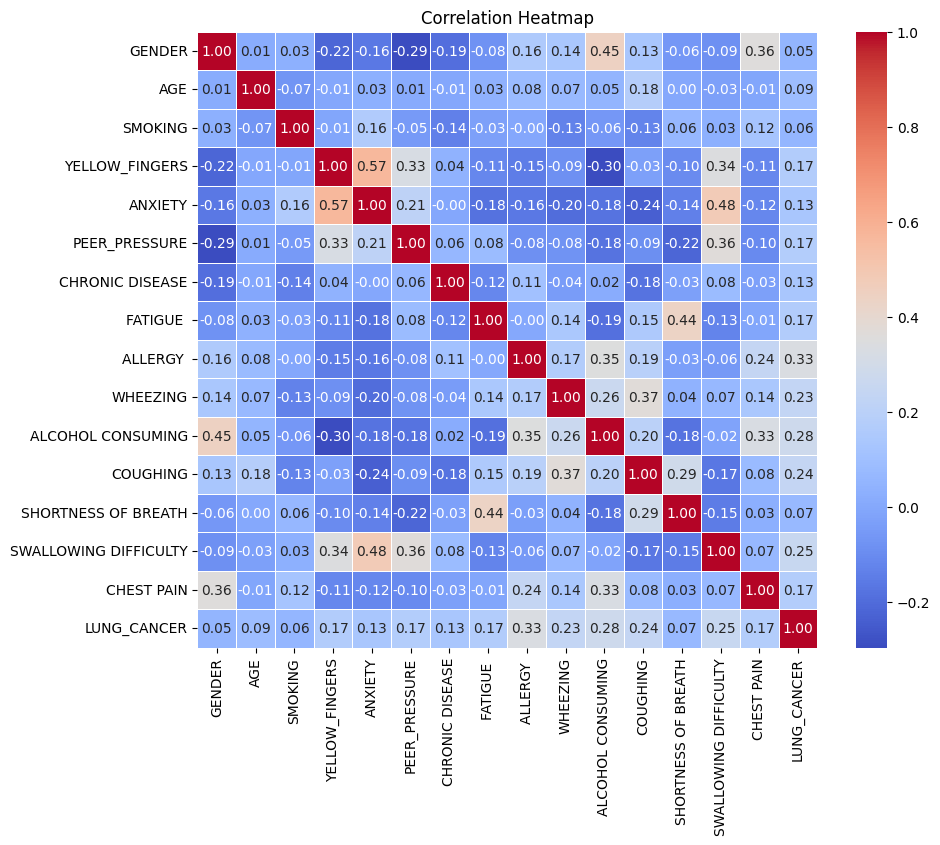

In [194]:
# Convert 'GENDER' column: 'M' -> 1, 'F' -> 0
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})

# Convert 'LUNG_CANCER' column: 'YES' -> 1, 'NO' -> 0
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Now calculate the correlation matrix for numeric columns
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [198]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [213]:
threshold_age = 60

# Convert 'AGE' to binary: 1 if AGE >= threshold_age, otherwise 0
data['AGE_BINARY'] = (data['AGE'] >= threshold_age).astype(int)

# Display the first few rows to verify
data[['AGE', 'AGE_BINARY']].head()

,AGE,AGE_BINARY
0,69,1
1,74,1
2,59,0
3,63,1
4,63,1


In [216]:
data = data.drop(columns=['AGE_BINARY'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [215]:
data_B = data.drop(columns=['AGE'])
data_B.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_BINARY
0,1,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,0,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,1,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,0,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 305 non-null    int64
 1   AGE                    305 non-null    int64
 2   SMOKING                305 non-null    int64
 3   YELLOW_FINGERS         305 non-null    int64
 4   ANXIETY                305 non-null    int64
 5   PEER_PRESSURE          305 non-null    int64
 6   CHRONIC DISEASE        305 non-null    int64
 7   FATIGUE                305 non-null    int64
 8   ALLERGY                305 non-null    int64
 9   WHEEZING               305 non-null    int64
 10  ALCOHOL CONSUMING      305 non-null    int64
 11  COUGHING               305 non-null    int64
 12  SHORTNESS OF BREATH    305 non-null    int64
 13  SWALLOWING DIFFICULTY  305 non-null    int64
 14  CHEST PAIN             305 non-null    int64
 15  LUNG_CANCER            305 non-null    int64


## MODEL SELECTION AND TRAINING


##### Logistic Regression

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [218]:
# Split into features and target
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']  # Encode target

In [219]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [220]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [221]:
lr_pred = lr_model.predict(X_test)

In [223]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


Confusion Matrix:
[[ 3  0]
 [ 2 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.97      0.98        58

    accuracy                           0.97        61
   macro avg       0.80      0.98      0.87        61
weighted avg       0.98      0.97      0.97        61



In [224]:
accuracy = accuracy_score(y_test, lr_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.72%


##### ACCURACY of the Logistic Regression is 96.72%


##### Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [230]:
rf_pred_test = rf_model.predict(X_test)
rf_pred_train = rf_model.predict(X_train)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

#accuracy
test_accuracy = accuracy_score(y_test, rf_pred_test)
train_accuracy = accuracy_score(y_train, rf_pred_train)
print(f"Model Accuracy on Test Data: {test_accuracy * 100:.2f}%")
print(f"Model Accuracy on Train Data: {train_accuracy * 100:.2f}%")

Confusion Matrix:
[[ 3  0]
 [ 3 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.95      0.97        58

    accuracy                           0.95        61
   macro avg       0.75      0.97      0.82        61
weighted avg       0.98      0.95      0.96        61

Model Accuracy on Test Data: 95.08%
Model Accuracy on Train Data: 100.00%


#### Accuracy of Random Forest is 95.08%

##### Neural Networks

In [233]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [235]:
nn_pred_test =nn_model.predict(X_test)
nn_pred_train =nn_model.predict(X_train)

In [236]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_pred))
print("\nClassification Report:")
print(classification_report(y_test, nn_pred))

test_accuracy = accuracy_score(y_test, nn_pred_test)
train_accuracy = accuracy_score(y_train, nn_pred_train)
print(f"Model Accuracy on Test Data: {test_accuracy * 100:.2f}%")
print(f"Model Accuracy on Train Data: {train_accuracy * 100:.2f}%")

Confusion Matrix:
[[ 1  2]
 [ 3 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.96      0.95      0.96        58

    accuracy                           0.92        61
   macro avg       0.61      0.64      0.62        61
weighted avg       0.93      0.92      0.92        61

Model Accuracy on Test Data: 91.80%
Model Accuracy on Train Data: 89.34%
